In [1]:
import pandas as pd

In [9]:
data=pd.read_excel('/content/Mc_Donalds.xlsx')

In [10]:
data.describe()

,Big Mac Price,New Hourly Wage
count,27.000000,27.000000
mean,2.238889,6.058889
std,0.844627,4.903372
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.500000


In [11]:
# prompt: check missing values

import pandas as pd
data=pd.read_excel('/content/Mc_Donalds.xlsx')
data.isnull().sum()


,0
Country,0
Big Mac Price,0
New Hourly Wage,0


In [14]:
duplicate_rows = data[data.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of duplicate rows:", len(duplicate_rows))

Duplicate Rows:
Empty DataFrame
Columns: [Country, Big Mac Price, New Hourly Wage]
Index: []
Number of duplicate rows: 0


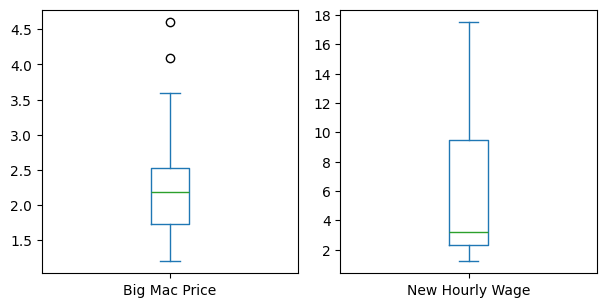

In [15]:
# prompt: Generate box plot for all columns

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in your example

# Generate box plots for all numerical columns
numerical_cols = data.select_dtypes(include=['number'])
numerical_cols.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))
plt.tight_layout()
plt.show()


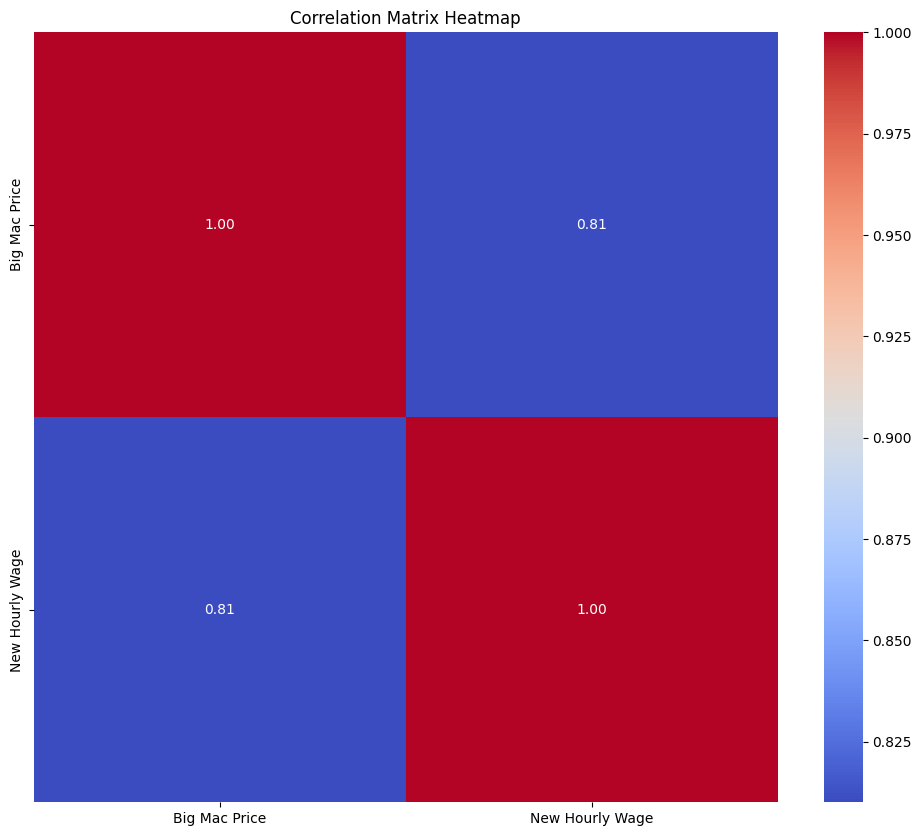

In [19]:
# prompt: Generate heatmap

import seaborn as sns
# Assuming 'data' DataFrame is already loaded and numerical_cols is defined

# Select numerical columns for the heatmap
# You might want to choose specific columns or handle missing values
heatmap_cols = numerical_cols  # Or a subset of numerical_cols

# Calculate the correlation matrix
corr_matrix = heatmap_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:

import statsmodels.api as sm

y = data['New Hourly Wage']
x = data['Big Mac Price']



In [25]:
x

,Big Mac Price
0,1.42
1,1.86
2,1.48
3,3.14
4,2.21
5,1.96
6,1.20
7,1.96
8,4.09
9,2.98


In [26]:
# prompt: Extract simple linear regression on x and y using stats model

import statsmodels.api as sm

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        New Hourly Wage   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     47.73
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           3.05e-07
Time:                        07:31:44   Log-Likelihood:                -66.314
No. Observations:                  27   AIC:                             136.6
Df Residuals:                      25   BIC:                             139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4704      1.625     -2.751

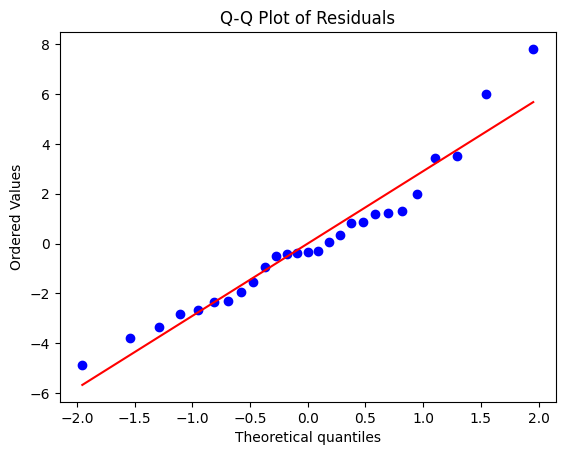

Shapiro-Wilk Test:
Statistic: 0.94723517229263
P-value: 0.18357056840795943
Residuals are likely normally distributed (fail to reject H0)


In [30]:
# prompt: check for residuals are normally distributed

import scipy.stats as stats

# Get the residuals from the model
residuals = model.resid

# Create a Q-Q plot to visually assess normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Perform a Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Interpret the results
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Residuals are likely normally distributed (fail to reject H0)")
else:
    print("Residuals are likely not normally distributed (reject H0)")


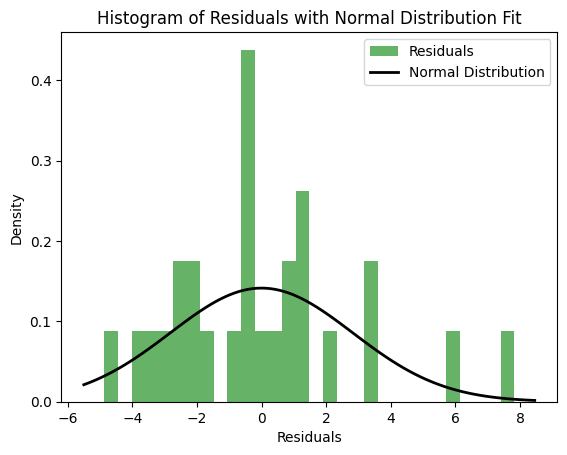

In [42]:
# prompt: check for residuals are normally distributed fit and plot histogram with line

import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'residuals' is already calculated as in your previous code

# Create a histogram of the residuals
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label='Residuals')

# Fit a normal distribution to the residuals
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Customize the plot
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Normal Distribution Fit')
plt.legend(loc='best')
plt.show()


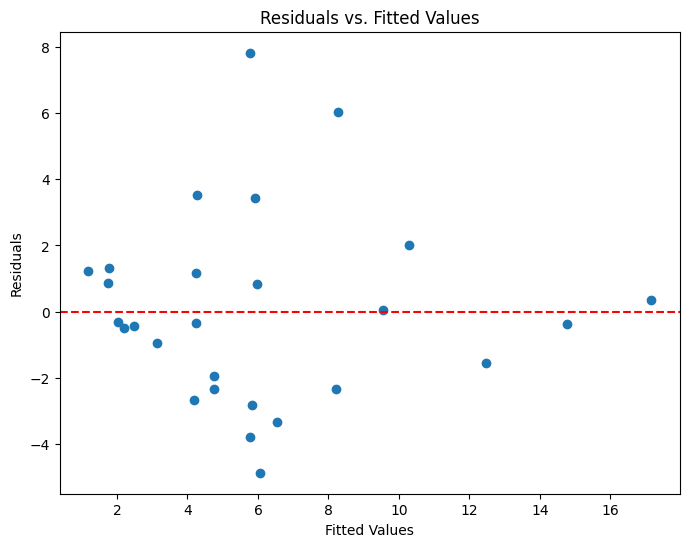

In [33]:
# prompt: check for homoscedasticity scatter plot

# Assuming 'model' (the OLS regression model) and 'residuals' are already defined

# Create a scatter plot of fitted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


Y test

H0 -  the model exhibits homoscedasticity

Ha - It is hetroscedasticity


In [48]:
# prompt: conduct white test for testing homoscedasticity

import statsmodels.stats.api as sms
# Perform the White test for heteroscedasticity
white_test = sms.het_white(residuals, model.model.exog)
print("White Test:")
labels = ['Test Statistic', 'P-value', 'F-Statistic', 'F-P-value']
print(dict(zip(labels, white_test)))

# Interpret the results
alpha = 0.05
if white_test[1] > alpha:
    print("Residuals exhibit homoscedasticity (fail to reject H0)")
else:
    print("Residuals exhibit heteroscedasticity (reject H0)")


White Test:
{'Test Statistic': 4.685184238152141, 'P-value': 0.096078268859063, 'F-Statistic': 2.5195014584861624, 'F-P-value': 0.10156743768331171}
Residuals exhibit homoscedasticity (fail to reject H0)
